In [1]:
import numpy as np
def create_data():
    features = np.array(
        [
            [2.88, 3.05],
            [3.1, 2.45],
            [3.05, 2.8],
            [2.9, 2.7],
            [2.75, 3.4],
            [3.23, 2.9],
            [3.2, 3.75],
            [3.5, 2.9],
            [3.65, 3.6],
            [3.35, 3.3],
        ]
    )
    labels = ["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"]
    return features, labels

In [2]:
features,labels = create_data()
print("features: \n",features)
print("labels: \n",labels)

features: 
 [[2.88 3.05]
 [3.1  2.45]
 [3.05 2.8 ]
 [2.9  2.7 ]
 [2.75 3.4 ]
 [3.23 2.9 ]
 [3.2  3.75]
 [3.5  2.9 ]
 [3.65 3.6 ]
 [3.35 3.3 ]]
labels: 
 ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


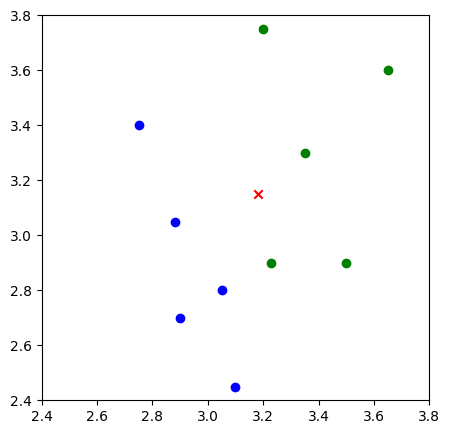

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
plt.xlim((2.4,3.8))
plt.ylim((2.4,3.8))

x_feature = list(map(lambda x:x[0],features))
y_feature = list(map(lambda y:y[1],features))

plt.scatter(x_feature[:5], y_feature[:5], c="b") 
plt.scatter(x_feature[5:], y_feature[5:], c="g")
plt.scatter([3.18], [3.15], c="r", marker="x")

Calculate distance:
Manhattion distance & Euclidean disatance

In [5]:
def manh_d(x,y):
    d = np.sum(np.abs(x-y))
    return d

def euc_d(x,y):
    d = np.sqrt(np.sum(np.square(x-y)))
    return d

In [6]:
import operator

def majority_voting(class_count):
    sorted_class_count = sorted(class_count.items(), 
                                key=operator.itemgetter(1), reverse=True
    )
    return sorted_class_count
arr = {"A": 3, "B": 2, "C": 6, "D": 5}
majority_voting(arr)

[('C', 6), ('D', 5), ('A', 3), ('B', 2)]

In [9]:
def knn_classify(test_data,train_data,labels,k):
    distances = [euc_d(test_data,train_data[i]) for i in range(len(train_data))]
    sorted_indices = np.argsort(distances)
    sorted_distance = np.sort(distances)
    
    class_count = {}
    for i in range(k):
        label = labels[sorted_indices[i]]
        class_count[label] = class_count.get(label,0) + 1
    final_label = majority_voting(class_count)
    return final_label,r

In [10]:
test_data = np.array([3.18, 3.15])
final_label, r = knn_classify(test_data, features, labels, 5)
final_label

[('B', 3), ('A', 2)]

In [11]:
def circle(r,a,b):
    theta = np.arange(0,2*np.pi,0.01)
    x = a + r * np.cos(theta)
    y = b + r * np.sin(theta)
    return x,y